## NN
### Aim
This script is used to train the NN model

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


In [6]:
# Load the processed data
X_train = np.load('data/split/X_train.npy')
y_train = np.load('data/split/y_train.npy')
X_test = np.load('data/split/X_test.npy')
y_test = np.load('data/split/y_test.npy')

## Model1: NN
Train with a neural network model

In [7]:
# Reshape the data
X_train_reshaped = X_train.reshape(-1, 100, 100, 1)
X_test_reshaped = X_test.reshape(-1, 100, 100, 1)
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define the model creation function
def create_model(units1, units2, units3, units4, units5, units6, units7, units8, learning_rate):
    model = Sequential([
        Input(shape=(100, 100)),
        Flatten(),
        Dense(units=units1, activation='relu'),
        Dense(units=units2, activation='relu'),
        Dense(units=units3, activation='relu'),
        Dense(units=units4, activation='relu'),
        Dense(units=units5, activation='relu'),
        Dense(units=units6, activation='relu'),
        Dense(units=units7, activation='relu'),
        Dense(units=units8, activation='relu'),
        Dense(3, activation='softmax')  # Output layer for 3 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Wrap the model using KerasClassifier
keras_model = KerasClassifier(
    model=create_model,
    verbose=1,  # Verbosity level for training
    units1=4048, units2=2048, units3=1024, units4=512,
    units5=256, units6=128, units7=64, units8=32,
    learning_rate=0.001, batch_size=32, epochs=10  # Default values
)

# Step 3: Define the hyperparameter grid
param_dist = {
    'model__units1': [4048, 2048],
    'model__units2': [2048, 1024],
    'model__units3': [1024, 512],
    'model__units4': [512, 256],
    'model__units5': [256, 128],
    'model__units6': [128, 64],
    'model__units7': [64, 32],
    'model__units8': [32, 16],
    'model__learning_rate': [0.001, 0.0001],
    'batch_size': [16, 32, 64],  # Not prefixed with `model__`
    'epochs': [10, 20]          # Not prefixed with `model__`
}

# Step 4: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    keras_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of different combinations to try
    cv=3,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Step 5: Fit the model
random_search.fit(X_train_reshaped, y_train_encoded)  # Replace with your training data

# Step 6: Get the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/20
Epoch 1/10
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.3059 - loss: 1.90163
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.3701 - loss: 2.62880
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.3159 - loss: 1.5563
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3955 - loss: 1.7443
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.3204 - loss: 1.4747
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3313 - loss: 1.4573Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3307 - loss: 1.4523
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.3140 - loss: 1.8498
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.3495 - loss: 1.7437
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.3319 - loss: 1.38926
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 40

30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5980 - loss: 0.8658
14/30 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.4844 - loss: 1.0689Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 523ms/step - accuracy: 0.3744 - loss: 2.18
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6097 - loss: 0.8376
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/stepccuracy: 0.2656 - loss: 1.13
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.3713 - loss: 2.0613
Epoch 2/10
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.3919 - loss: 1.17009
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.2976 - loss: 1.38535
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 856ms/step - accuracy: 0.6121 - loss: 0.8168
1/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/steptep - accuracy: 0.4805 - loss: 0.9437

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step accuracy: 0.3125 - loss: 1.
 6/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4773 - loss: 0.9489Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.4807 - loss: 1.0323
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3819 - loss: 1.56656
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.3381 - loss: 1.50698
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.3005 - loss: 1.8189
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.3499 - loss: 1.27036
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.3088 - loss: 1.5992
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.3044 - loss: 1.4230
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.3397 - loss: 1.1437
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.4956 - loss: 0.9487
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.3600 - loss: 1.12194
Epoch 3/10
8/8 ━━━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4841 - loss: 0.899392163
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 629ms/stepep - accuracy: 0.5307 - loss: 0.
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 770ms/step - accuracy: 0.5285 - loss: 0.9278
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/stepep - accuracy: 0.5414 - loss: 0.91
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 673ms/step - accuracy: 0.5451 - loss: 0.9060
Epoch 10/20
19/30 ━━━━━━━━━━━━━━━━━━━━ 7s 696ms/step - accuracy: 0.5505 - loss: 0.9053

/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 710ms/step - accuracy: 0.3475 - loss: 1.7924
24/30 ━━━━━━━━━━━━━━━━━━━━ 4s 739ms/step - accuracy: 0.5576 - loss: 0.8993Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 757ms/step - accuracy: 0.5660 - loss: 0.8928
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5541 - loss: 0.895759
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5738 - loss: 0.836860
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 749ms/step - accuracy: 0.5130 - loss: 0.9227
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5997 - loss: 0.85995
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 676ms/step - accuracy: 0.4481 - loss: 1.0387
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 647ms/step - accuracy: 0.5807 - loss: 0.8445
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.2889 - loss: 1.863591
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 693ms/step - accuracy: 0.5392 - loss: 0.9138
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 705ms/step - accuracy: 0.5629

30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5472 - loss: 0.8985
 8/15 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/stepEpoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step: 0.5000 - loss: 0.9180s: 0.
7/8 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6084 - loss: 0.8559Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.6051 - loss: 0.85354
Epoch 17/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.5368 - loss: 0.9368
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.3044 - loss: 1.0991
Epoch 7/20
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5525 - loss: 0.8735
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.6271 - loss: 0.8276
Epoch 17/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5432 - loss: 0.8757
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5445 - loss: 0.8837
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.3251 - loss: 1.0986
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5545 - l

In [41]:
# Build an NN model based on the best parameters
model = Sequential([
  Input(shape=(100,100,1)),   # The image is 100x100 pixels.
  Flatten(),
  Dense(units=2048, activation='relu'),
  Dense(units=2048, activation='relu'),  # Increased dense layer size
  Dense(units=1024, activation='relu'),  # Increased dense layer size                                      
  Dense(units=256, activation='relu'),  # Increased dense layer size
  Dense(units=256, activation='relu'),  # Increased dense layer size
  Dense(units=64, activation='relu'),  # Increased dense layer size
  Dense(units=64, activation='relu'),  # Increased dense layer size
  Dense(units=32, activation='relu'),  # Increased dense layer size
  Dense(3, activation='softmax')  # Two state classification - gives probability of belonging to class 0 or 1
])

In [42]:
model.compile(optimizer=Adam(learning_rate= 0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy', 'categorical_accuracy'])

# Print the model summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 2048)           │    20,482,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,127,555 (103.48 MB)

 Trainable params: 27,127,555 (103.48 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(x=X_train_reshaped, y=y_train_encoded, batch_size=16,
                      epochs=20, shuffle=True,
                      validation_split=0.2)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.3127 - categorical_accuracy: 0.3127 - loss: 1.5290 - val_accuracy: 0.3542 - val_categorical_accuracy: 0.3542 - val_loss: 1.1768
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.3628 - categorical_accuracy: 0.3628 - loss: 1.1007 - val_accuracy: 0.2917 - val_categorical_accuracy: 0.2917 - val_loss: 1.0405
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.4566 - categorical_accuracy: 0.4566 - loss: 1.0000 - val_accuracy: 0.4097 - val_categorical_accuracy: 0.4097 - val_loss: 0.9335
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.5159 - categorical_accuracy: 0.5159 - loss: 0.9129 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.5625 - val_loss: 0.8558
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.5717 - categorical_accuracy: 0.5717 - loss: 0.8749 - val_accuracy: 0.5764 - val_categorical_accuracy: 0.5764 - val_loss: 0.8424
Epoch 6/20
36/36 ━━━━━━━━━━━━━

In [44]:
epochs = history.epoch
hist = pd.DataFrame(history.history)
hist

,accuracy,categorical_accuracy,loss,val_accuracy,val_categorical_accuracy,val_loss
0,0.338542,0.338542,1.324220,0.354167,0.354167,1.176790
1,0.416667,0.416667,1.056942,0.291667,0.291667,1.040550
2,0.463542,0.463542,0.988391,0.409722,0.409722,0.933521
3,0.529514,0.529514,0.917013,0.562500,0.562500,0.855819
4,0.543403,0.543403,0.882494,0.576389,0.576389,0.842407
5,0.541667,0.541667,0.892865,0.597222,0.597222,0.851954
6,0.539931,0.539931,0.875387,0.555556,0.555556,0.869697
7,0.553819,0.553819,0.869235,0.590278,0.590278,0.864982
8,0.526042,0.526042,0.897941,0.569444,0.569444,0.831323
9,0.531250,0.531250,0.924284,0.548611,0.548611,0.908062


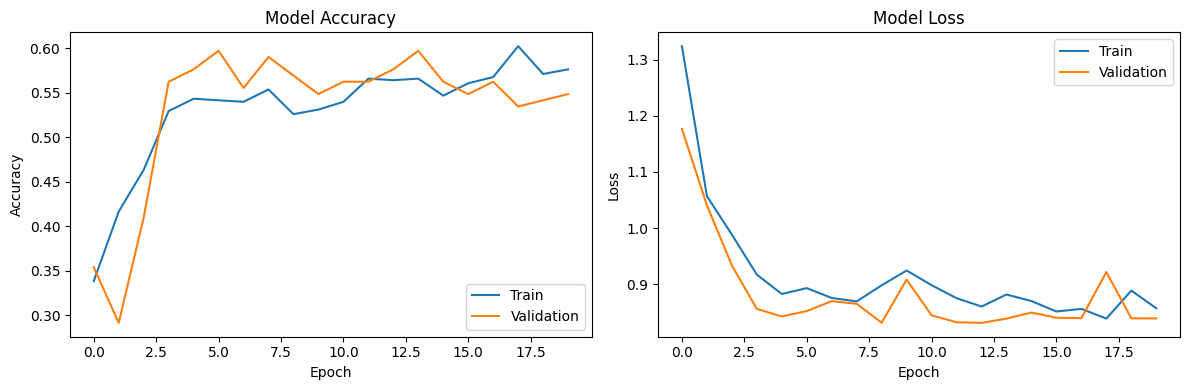

In [45]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Train', 'Validation'])
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['Train', 'Validation'])
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [46]:
# Save the model
model.save('NN_tuned.h5')
model.save('NN_tuned.keras')

Problems in this model:
1. Oververfitting Pattern: The validation accuracy (red line) initially improves but shows fluctuations or even starts to decline after a certain point (around 10–15 epochs). This indicates overfitting: the model is learning the training data too well but failing to generalize to unseen validation data.
2. Instability in valadation accuracy: The validation accuracy fluctuates significantly, suggesting that the model might be sensitive to the validation dataset, or there might be issues with the data distribution, insufficient regularization, or hyperparameter choices.
3. Performance Plateau: After a few epochs (around 5–7 epochs), the training accuracy plateaus, but the validation accuracy does not show consistent improvement. This might indicate that the model has reached its learning capacity for the given data or architecture.
4. High Loss: The loss values (both training and validation) are relatively high, indicating that the model is not performing well. This suggests that the model is not able to learn the underlying patterns in the data effectively.
5. Low Accuracy: The overall accuracy of the model is low, indicating that the model is not able to correctly classify the majority of the test data. This suggests that the model is not able to generalize well to unseen data.

In [47]:
# Use the model to make predictions on the testset
y_pred_prob = model.predict(X_test_reshaped)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [48]:
y_pred_prob[0:20]

array([[5.7955045e-01, 1.8370976e-01, 2.3673978e-01],
       [1.8502621e-02, 4.2144576e-01, 5.6005168e-01],
       [6.0266137e-01, 1.7412156e-01, 2.2321697e-01],
       [7.9693064e-02, 3.8100922e-01, 5.3929764e-01],
       [5.8613980e-01, 1.8089594e-01, 2.3296422e-01],
       [5.2753005e-02, 4.0306664e-01, 5.4418027e-01],
       [5.6370664e-01, 1.9009341e-01, 2.4619998e-01],
       [5.7881850e-01, 1.8393788e-01, 2.3724364e-01],
       [5.9312105e-01, 1.7795005e-01, 2.2892889e-01],
       [6.1270124e-01, 1.6982955e-01, 2.1746929e-01],
       [5.8068818e-01, 1.8307187e-01, 2.3623993e-01],
       [3.0932151e-06, 4.6817023e-01, 5.3182673e-01],
       [1.1251424e-05, 4.9905309e-01, 5.0093567e-01],
       [5.7237053e-01, 1.8656270e-01, 2.4106681e-01],
       [2.0870417e-03, 4.2772174e-01, 5.7019126e-01],
       [2.7581779e-02, 4.2449945e-01, 5.4791880e-01],
       [6.0137326e-01, 1.7458418e-01, 2.2404252e-01],
       [4.0645147e-04, 4.3943515e-01, 5.6015843e-01],
       [3.1945799e-03, 4.600

In [49]:
y_pred = y_pred_prob.argmax(axis=1)
y_pred


array([0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       1, 2, 0, 0])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


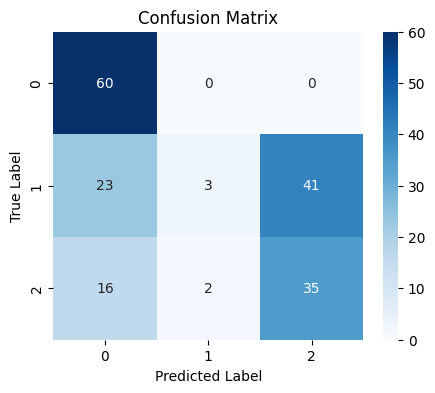

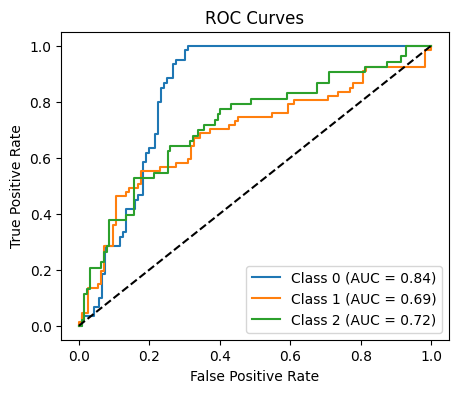


Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.75        60
           1       0.60      0.04      0.08        67
           2       0.46      0.66      0.54        53

    accuracy                           0.54       180
   macro avg       0.56      0.57      0.46       180
weighted avg       0.56      0.54      0.44       180


Overall Accuracy: 0.5444


In [52]:
def evaluate_model(model, X_test, y_test):
    """
    Comprehensive model evaluation
    """
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    report = classification_report(y_test, y_pred_classes)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curves
    plt.figure(figsize=(5, 4))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred[:, i])
        auc = roc_auc_score(y_test == i, y_pred[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()
    
    # Print metrics
    print("\nClassification Report:")
    print(report)
    print(f"\nOverall Accuracy: {accuracy:.4f}")

# Use the evaluation function
evaluate_model(model, X_test_reshaped, y_test)

In [55]:
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def cross_validate_model(X, y, n_splits=5):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        print(f"\nFold {fold + 1}/{n_splits}")
        
        # Split data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Create and train model
        model = Sequential([
            Input(shape=(100,100,1)),   # The image is 100x100 pixels.
            Flatten(),
            Dense(units=2048, activation='relu'),
            Dense(units=2048, activation='relu'),  # Increased dense layer size
            Dense(units=1024, activation='relu'),  # Increased dense layer size                                      
            Dense(units=256, activation='relu'),  # Increased dense layer size
            Dense(units=256, activation='relu'),  # Increased dense layer size
            Dense(units=64, activation='relu'),  # Increased dense layer size
            Dense(units=64, activation='relu'),  # Increased dense layer size
            Dense(units=32, activation='relu'),  # Increased dense layer size
            Dense(3, activation='softmax')   # Two state classification - gives probability of belonging to class 0 or 1
                        ])
        model.compile(optimizer=Adam(learning_rate= 0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy', 'categorical_accuracy'])
        history = model.fit(x=X_train_reshaped, y=y_train_encoded, batch_size=16,
                      epochs=20, shuffle=True,
                      validation_split=0.2)
        
        # Evaluate
        score = model.evaluate(X_val, y_val, verbose=0)
        scores.append(score[1])  # Append accuracy
        
    print(f"\nCross-validation scores: {scores}")
    print(f"Mean accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

In [56]:
cross_validate_model(X_train_reshaped, y_train_encoded)


Fold 1/5
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.3681 - categorical_accuracy: 0.3681 - loss: 1.6359 - val_accuracy: 0.5000 - val_categorical_accuracy: 0.5000 - val_loss: 1.0691
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.4888 - categorical_accuracy: 0.4888 - loss: 1.0076 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.5625 - val_loss: 0.8584
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.5383 - categorical_accuracy: 0.5383 - loss: 0.8943 - val_accuracy: 0.5903 - val_categorical_accuracy: 0.5903 - val_loss: 0.8380
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.5540 - categorical_accuracy: 0.5540 - loss: 0.8614 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.5625 - val_loss: 0.8825
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.5276 - categorical_accuracy: 0.5276 - loss: 0.9180 - val_accuracy: 0.5556 - val_categorical_accuracy: 0.5556 - val_loss: 0.8449
Epoch 6/20
36/36 ━━━